In [1]:
from keras.datasets import cifar100
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

169017344/169001437 [==============================] - 11s 0us/step


In [8]:
labels = pd.read_csv(r"/content/cifar100_labels.csv", header=None, index_col=0)

In [9]:
labels.head()

,1
0,
0,apple
1,aquarium_fish
2,baby
3,bear
4,beaver


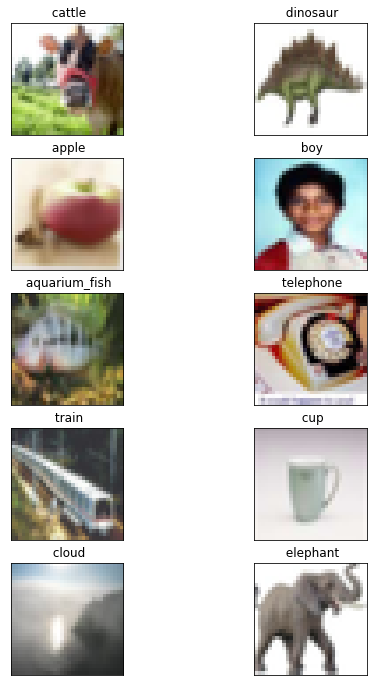

In [13]:
plt.figure(figsize=(8, 12))

for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(X_train[i])
    plt.title(labels[1][y_train[i][0]])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [14]:
X_train = X_train / 255
X_test = X_test / 255

In [15]:
model = tf.keras.Sequential([
                            tf.keras.layers.InputLayer(input_shape=(32,32,3)),
                            tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', strides=1, padding='same'),
                            tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'),
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', strides=1, padding='same'),
                            tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(512, activation = 'relu'),
                            tf.keras.layers.Dense(256, activation = 'relu'),

                            tf.keras.layers.Dense(len(np.unique(y_train)), activation = 'softmax')
                             
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0

In [16]:
from keras.callbacks import EarlyStopping

In [17]:
early_stopping = EarlyStopping(monitor = "val_loss", verbose = 1, patience = 3)

In [18]:
model.fit(X_train, y_train, epochs=50, callbacks=[early_stopping], validation_data=(X_test, y_test))

Epoch 1/50
1563/1563 [==============================] - 106s 68ms/step - loss: 3.7352 - accuracy: 0.1276 - val_loss: 3.2203 - val_accuracy: 0.2187
Epoch 2/50
1563/1563 [==============================] - 106s 68ms/step - loss: 2.9559 - accuracy: 0.2641 - val_loss: 2.8483 - val_accuracy: 0.2855
Epoch 3/50
1563/1563 [==============================] - 120s 77ms/step - loss: 2.5973 - accuracy: 0.3347 - val_loss: 2.7077 - val_accuracy: 0.3223
Epoch 4/50
1563/1563 [==============================] - 95s 61ms/step - loss: 2.3393 - accuracy: 0.3915 - val_loss: 2.5509 - val_accuracy: 0.3572
Epoch 5/50
1563/1563 [==============================] - 93s 60ms/step - loss: 2.1226 - accuracy: 0.4346 - val_loss: 2.5645 - val_accuracy: 0.3600
Epoch 6/50
1563/1563 [==============================] - 106s 68ms/step - loss: 1.9407 - accuracy: 0.4751 - val_loss: 2.5489 - val_accuracy: 0.3683
Epoch 7/50
1563/1563 [==============================] - 93s 59ms/step - loss: 1.7669 - accuracy: 0.5163 - val_loss: 2.53

In [20]:
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix

In [21]:
prob = model.predict(X_test)
pred = np.argmax(prob, axis=1)

In [22]:
print(accuracy_score(y_test, pred))

0.3713


In [23]:
print(log_loss(y_test, prob))

2.89895034657954


In [24]:
confusion_matrix(y_test, pred)

array([[59,  1,  1, ...,  0,  0,  0],
       [ 0, 50,  0, ...,  1,  0,  0],
       [ 2,  1, 22, ...,  1,  2,  0],
       ...,
       [ 0,  0,  0, ..., 32,  0,  1],
       [ 0,  1,  9, ...,  1,  7,  2],
       [ 0,  0,  0, ...,  0,  0, 35]])

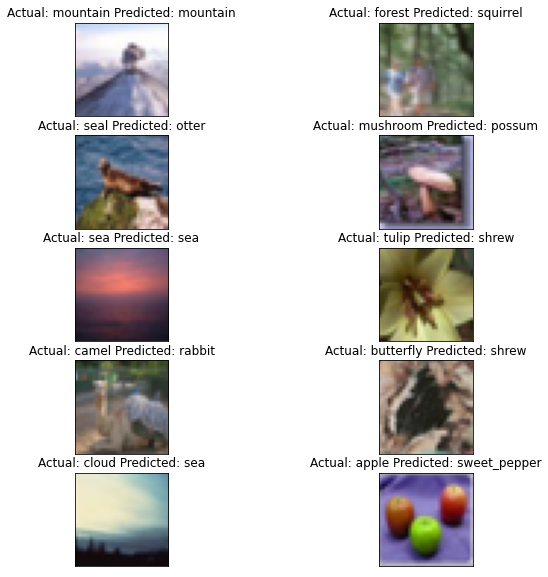

In [26]:
plt.figure(figsize=(10, 10))

for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(X_test[i])
    string = "Actual:" + labels[1][y_test[i][0]] + " Predicted:" + labels[1][pred[i]]
    plt.title(string)
    plt.xticks([])
    plt.yticks([])
plt.show()